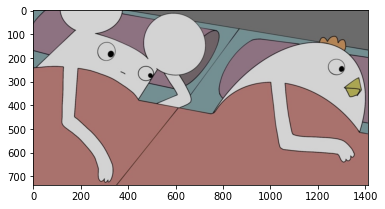

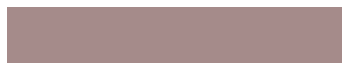

In [33]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def centroid_histogram(clt):

    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors(hist, centroids):

    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):

        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    return bar

def image_color_cluster(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = 1)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    
image_path = "matuo.jpg"

image = mpimg.imread(image_path)
plt.imshow(image)

image_color_cluster(image_path)

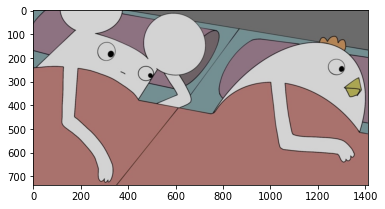

In [43]:
import numpy as np
import PIL.ImageDraw
import scipy.stats
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

source_file = 'matuo.jpg'
source = PIL.Image.open(source_file)

small_img = source.resize((1413, 736))
color_arr = np.array(small_img)
w_size, h_size, n_color = color_arr.shape
color_arr = color_arr.reshape(w_size * h_size, n_color)
color_code = ['{:02x}{:02x}{:02x}'.format(*elem) for elem in color_arr]
mode, _ = scipy.stats.mode(color_code)
r = int(mode[0][0:2], 16)
g = int(mode[0][2:4], 16)
b = int(mode[0][4:6], 16)
color_mode = (r, g, b)

im = PIL.Image.new('RGB', (100, 100), color_mode)
plt.imshow(small_img)
im.save('matuo.png')

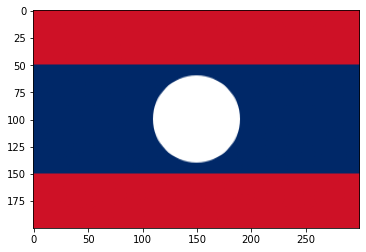

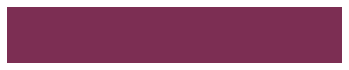

In [45]:
import numpy as np
import cv2
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

def centroid_histogram(clt):

    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plot_colors(hist, centroids):

    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):

        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    return bar

def image_color_cluster(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = 1)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(bar)
    plt.show()
    
image_path = "kokki.png"

image = mpimg.imread(image_path)
plt.imshow(image)

image_color_cluster(image_path)